In [2]:
import pandas as pd

cols = ["title", "price", "listPrice", "stars", "reviews"]

df = pd.read_csv("../data/amazon_products.csv", usecols=cols)

df.head()


,title,stars,reviews,price,listPrice
0,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,0.00
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,209.99
2,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,429.99
3,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,354.37
4,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,309.99


In [3]:
df.shape


(1426337, 5)

In [4]:
df = df.sample(100000, random_state=42)
df.shape


(100000, 5)

In [5]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["listPrice"] = pd.to_numeric(df["listPrice"], errors="coerce")

df.isnull().sum()


title        0
stars        0
reviews      0
price        0
listPrice    0
dtype: int64

In [6]:
df["discount_percent"] = ((df["listPrice"] - df["price"]) / df["listPrice"]) * 100

df[["title","price","listPrice","discount_percent"]].head()



,title,price,listPrice,discount_percent
904813,Jitsu Squad (PS5),39.82,0.00,-inf
426645,Google WiFi Wall Mount ABS Bracket Holder Shel...,11.99,0.00,-inf
395996,"Cables Direct Online, Bulk 18/4 Stranded Condu...",94.95,0.00,-inf
986224,"Houseables 4 Oz Plastic Containers with Lids, ...",13.58,15.39,11.760884
1132337,co2CREA Hard Travel Case Replacement for TP-Li...,14.99,0.00,-inf


In [7]:
df = df[df["listPrice"] > 0]


In [8]:
df["discount_percent"] = ((df["listPrice"] - df["price"]) / df["listPrice"]) * 100
df.describe()


,stars,reviews,price,listPrice,discount_percent
count,24404.000000,24404.000000,24404.000000,24404.000000,24404.000000
mean,4.222451,352.100516,39.821667,51.622761,21.052215
std,0.999256,2696.104470,64.838106,83.114564,14.346300
min,0.000000,0.000000,0.000000,1.740000,-353.218495
25%,4.200000,0.000000,11.990000,15.390000,10.010010
50%,4.500000,0.000000,19.990000,25.990000,17.630056
75%,4.700000,0.000000,38.952500,49.990000,29.391963
max,5.000000,118833.000000,916.950000,999.950000,100.000000


In [9]:
def classify_discount(d):
    if d < 0:
        return "Fake Price"
    elif d > 80:
        return "Suspicious Discount"
    else:
        return "Normal Discount"

df["discount_type"] = df["discount_percent"].apply(classify_discount)

df["discount_type"].value_counts()


discount_type
Normal Discount        24355
Fake Price                28
Suspicious Discount       21
Name: count, dtype: int64

In [10]:
df[df["discount_type"] == "Fake Price"][["title","price","listPrice","discount_percent"]].head(10)


,title,price,listPrice,discount_percent
1174526,Petz Catz 2 - Nintendo DS,32.97,17.00,-93.941176
73364,Kingdom Hearts III - PlayStation 4 Deluxe Edition,73.49,59.99,-22.503751
315827,NBA 2K19 (Nintendo Switch),49.99,11.03,-353.218495
315341,The Last Samurai,19.99,5.97,-234.840871
580842,"252-LCT100 Lens Cleaning Towelette Dispenser, ...",15.33,13.04,-17.561350
1176536,FIFA Soccer 09 All-Play - Nintendo Wii,19.50,15.99,-21.951220
652370,Dead Alliance: Day One Edition - Xbox One,21.49,18.41,-16.730038
919197,Shaun White Snowboarding - Sony PSP,26.99,10.72,-151.772388
736876,Life Is Strange: True Colors Standard - Xbox [...,59.99,29.99,-100.033344
792360,wet n wild Fantasy Makers Halloween Paint Pale...,6.95,6.49,-7.087827


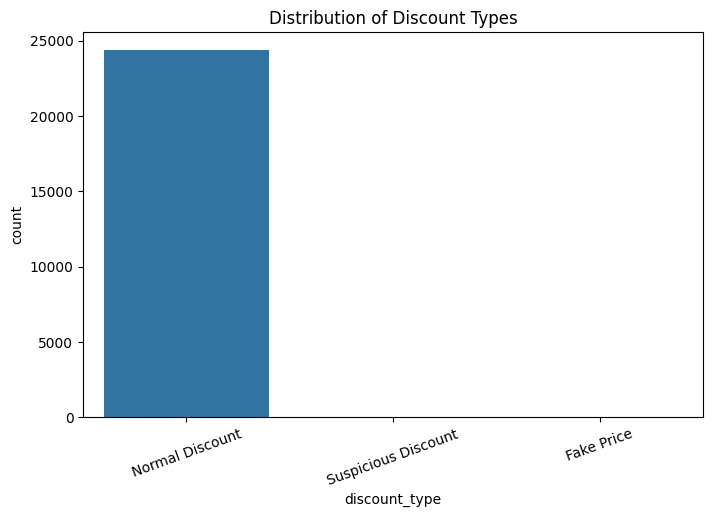

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="discount_type", data=df)
plt.title("Distribution of Discount Types")
plt.xticks(rotation=20)
plt.show()


In [12]:
def authenticity_score(row):
    score = 100
    
    # discount logic
    if row["discount_percent"] < 0:
        score -= 70
    elif row["discount_percent"] > 80:
        score -= 40
    elif row["discount_percent"] > 50:
        score -= 10
        
    # rating trust
    if row["stars"] < 3:
        score -= 20
        
    # review trust
    if row["reviews"] < 50:
        score -= 10
        
    return max(score,0)

df["authenticity_score"] = df.apply(authenticity_score, axis=1)

df[["title","discount_percent","stars","reviews","authenticity_score"]].head(10)


,title,discount_percent,stars,reviews,authenticity_score
986224,"Houseables 4 Oz Plastic Containers with Lids, ...",11.760884,4.6,0,90
26048,MBM131 Men's Black 11-Inch Classic Square Toe ...,25.681712,4.4,0,90
919984,Coated Dumbbell Weight | Multiple Handle Options,16.756982,4.7,0,90
100063,Toddler Boys' Relaxed Organic Cotton Short Sle...,20.000000,5.0,1,90
179844,"Yankee Candle Oil, Sleep Diffuser Refill, Blue...",10.962822,4.3,469,100
310843,Men Linen Flat Ivy Breathable Summer Newsboy Hat,11.771630,4.2,1290,100
150898,Satco 60 Watt 120 V T9 Incandescent Light Bulb...,16.669445,0.0,0,70
672283,"Face Lift Tape, Face Tape Lifting Invisible, F...",16.847373,4.3,0,90
50487,"2500W Portable Handheld Steam Cleaner, High Te...",6.124627,4.0,80,100
637878,Nordic Pure 20x25x5 MERV 12 Pleated Lennox X66...,7.247427,4.7,0,90


In [13]:
df.sort_values(by="authenticity_score", ascending=False)[
    ["title","price","listPrice","discount_percent","stars","reviews","authenticity_score"]
].head(10)


,title,price,listPrice,discount_percent,stars,reviews,authenticity_score
266586,CEWOR 4pcs Artificial Cherry Blossom Flower Vi...,17.99,26.99,33.345684,4.5,5294,100
179844,"Yankee Candle Oil, Sleep Diffuser Refill, Blue...",9.34,10.49,10.962822,4.3,469,100
107272,"Tulip One-Step Tie-Dye Kit Two-Minute Tie Dye,...",12.99,14.99,13.342228,4.7,193,100
72931,Borderlands 3 (PS4),14.28,16.28,12.285012,4.3,1342,100
50487,"2500W Portable Handheld Steam Cleaner, High Te...",43.99,46.86,6.124627,4.0,80,100
310843,Men Linen Flat Ivy Breathable Summer Newsboy Hat,14.99,16.99,11.771630,4.2,1290,100
49566,EnviroCare Replacement Vacuum Cleaner Filter S...,9.84,12.99,24.249423,4.7,683,100
178376,LegActivator - The Seated Leg Exerciser & Phys...,259.00,349.00,25.787966,4.0,504,100
166588,GRAND PITSTOP Tire Puncture Repair Kit with 30...,44.99,52.99,15.097188,4.2,2258,100
304528,"850+ Pcs Party Favors for Kids 4-8 8-12, Party...",29.99,36.99,18.924034,4.3,277,100


In [14]:
df.sort_values(by="authenticity_score", ascending=True)[
    ["title","price","listPrice","discount_percent","stars","reviews","authenticity_score"]
].head(10)


,title,price,listPrice,discount_percent,stars,reviews,authenticity_score
1391540,Mohawk Epoxy Putty Stick (Natural Oak) for Per...,19.49,19.38,-0.567595,4.7,0,20
1010302,Designer Wellness Designer Whey Natural 100% W...,19.99,18.96,-5.432489,4.3,0,20
21062,Resident Evil: Revelations 2 - Xbox 360,43.00,19.84,-116.733871,4.3,0,20
918828,Mx vs ATV Untamed - Sony PSP,40.55,19.99,-102.851426,3.8,0,20
522602,"Dynarex White Petrolatum, Petroleum Jelly for ...",14.82,13.70,-8.175182,4.7,0,20
1173672,Toy Story 3 The Video Game - Nintendo DS,41.12,19.99,-105.702851,4.5,0,20
732997,NHL 15 - PlayStation 3,39.93,22.98,-73.759791,4.2,0,20
411398,Brush Buddies Hot Wheels Kids Toothbrushes Kit...,6.00,4.99,-20.240481,4.7,0,20
792360,wet n wild Fantasy Makers Halloween Paint Pale...,6.95,6.49,-7.087827,4.8,0,20
1174526,Petz Catz 2 - Nintendo DS,32.97,17.00,-93.941176,4.0,0,20
